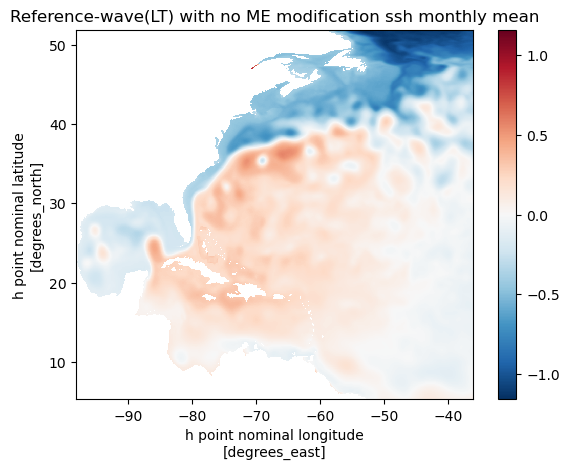

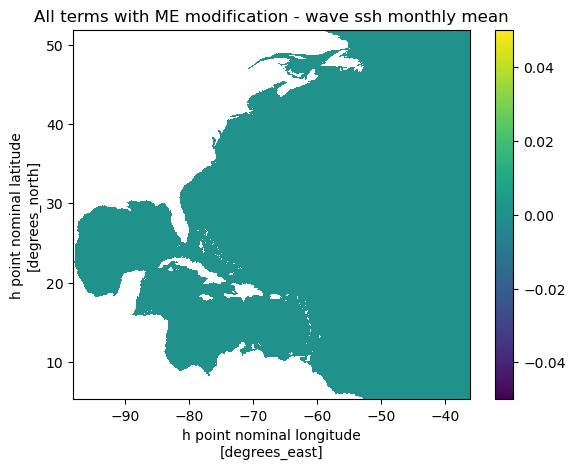

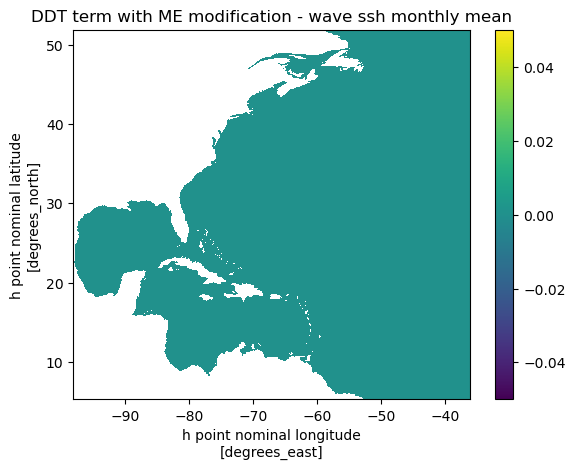

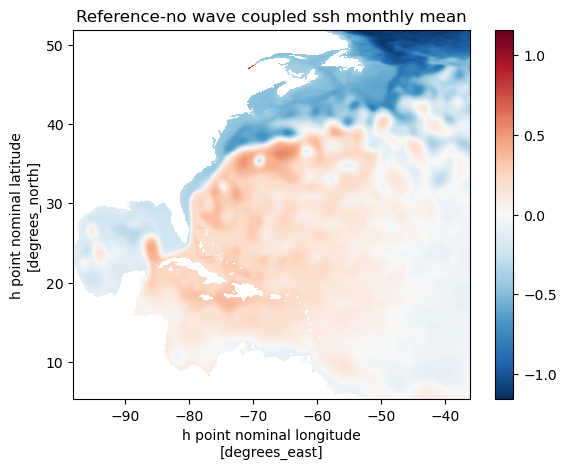

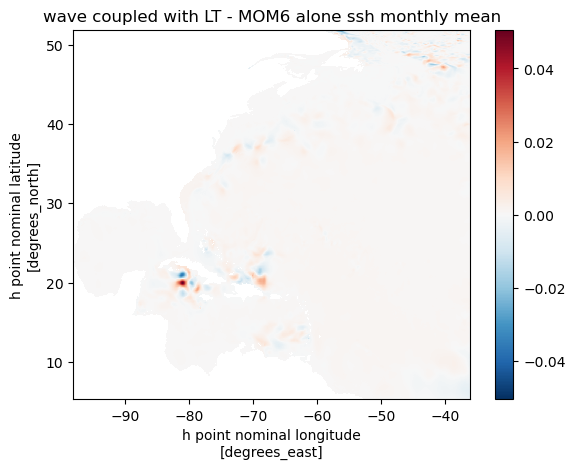

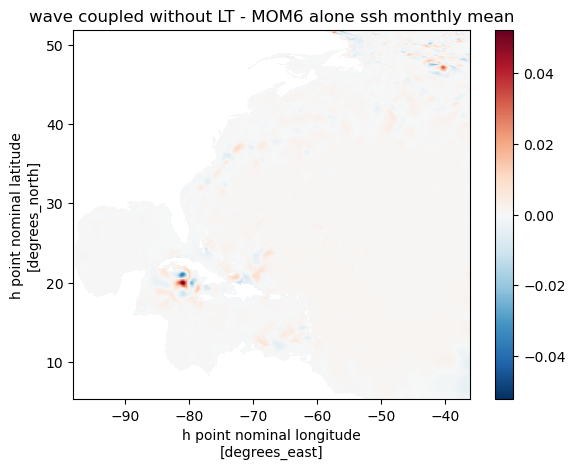

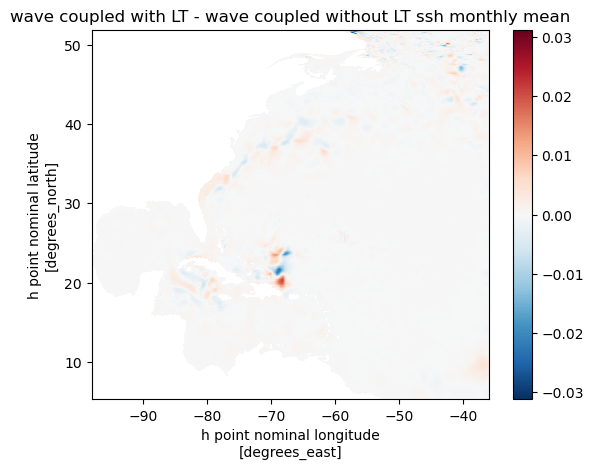

<xarray.Variable (time: 59, yh: 845, xh: 775)>
array([[[      nan,       nan, ...,  0.054382,  0.052154],
        [      nan,       nan, ...,  0.046341,  0.044026],
        ...,
        [      nan,       nan, ..., -1.044398, -1.031124],
        [      nan,       nan, ..., -1.047356, -1.035992]],

       [[      nan,       nan, ...,  0.039771,  0.038065],
        [      nan,       nan, ...,  0.03009 ,  0.028373],
        ...,
        [      nan,       nan, ..., -1.056   , -1.042965],
        [      nan,       nan, ..., -1.060471, -1.047271]],

       ...,

       [[      nan,       nan, ...,  0.046703,  0.045264],
        [      nan,       nan, ...,  0.045939,  0.044618],
        ...,
        [      nan,       nan, ..., -1.026744, -1.026838],
        [      nan,       nan, ..., -1.027635, -1.027156]],

       [[      nan,       nan, ...,  0.045642,  0.044926],
        [      nan,       nan, ...,  0.045539,  0.044817],
        ...,
        [      nan,       nan, ..., -1.044482, -1.045764],
        [      nan,       nan, ..., -1.045591, -1.04628 ]]], dtype=float32)
Attributes:
    units:          m
    long_name:      Sea Surface Height
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray
import numpy as np
import logging

    # Ideally would use SSH, but some diag_tables only saved zos----for coupled waves
pp_root_wave="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_wave/"
pp_root_uncou="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALTuncou/"
pp_root_all="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_all/"
pp_root_ddt="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_DDT/"
pp_root_pgf="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_PGF/"
pp_root_vf="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_VF/"
pp_root_nolan="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling_ZC/examples/NWA12.COBALT_wavenoLan/"


ocean_daily_wave= xarray.open_dataset(pp_root_wave+"19930101.ocean_daily.nc")
ocean_daily_uncou= xarray.open_dataset(pp_root_uncou+"19930101.ocean_daily.nc")
ocean_daily_all= xarray.open_dataset(pp_root_all+"19930101.ocean_daily.nc")
ocean_daily_ddt= xarray.open_dataset(pp_root_ddt+"19930101.ocean_daily.nc")
ocean_daily_pgf= xarray.open_dataset(pp_root_pgf+"19930101.ocean_daily.nc")
ocean_daily_vf= xarray.open_dataset(pp_root_vf+"19930101.ocean_daily.nc")
ocean_daily_nolan= xarray.open_dataset(pp_root_nolan+"19930101.ocean_daily.nc")

model_grid_x = ocean_daily_wave.variables['xh']
model_grid_y = ocean_daily_wave.variables['yh']

#------------------------------------------ssh comparison between different momentum equations
ssh_wave=ocean_daily_wave.variables['ssh']
t_wave=ocean_daily_wave.variables['time']
ssh_wave_ave = ssh_wave.mean('time')
SST_wave=ocean_daily_wave.variables['SST']
SST_wave_ave = SST_wave.mean('time')
MLD_EN1_wave=ocean_daily_wave.variables['MLD_EN1']
MLD_EN1_wave_ave = MLD_EN1_wave.mean('time')
ssx_wave=ocean_daily_wave.variables['surface_stokes_x']
ssy_wave=ocean_daily_wave.variables['surface_stokes_y']
ssx_wave_ave = ssx_wave.mean('time')[:,1:]
ssy_wave_ave = ssy_wave.mean('time')[1:,:]


ssh_uncou=ocean_daily_uncou.variables['ssh']
ssh_uncou=ssh_uncou[:59,:,:]
t_uncou=ocean_daily_uncou.variables['time']
ssh_uncou_ave = ssh_uncou.mean('time')
SST_uncou=ocean_daily_uncou.variables['SST']
SST_uncou=SST_uncou[:59,:,:]
SST_uncou_ave = SST_uncou.mean('time')
MLD_EN1_uncou=ocean_daily_uncou.variables['MLD_EN1']
MLD_EN1_uncou=MLD_EN1_uncou[:59,:,:]

MLD_EN1_uncou_ave = MLD_EN1_uncou.mean('time')



ssh_all=ocean_daily_all.variables['ssh']
t_all=ocean_daily_all.variables['time']
ssh_all_ave = ssh_all.mean('time')
SST_all=ocean_daily_all.variables['SST']
SST_all_ave = SST_all.mean('time')
MLD_EN1_all=ocean_daily_all.variables['MLD_EN1']
MLD_EN1_all_ave = MLD_EN1_all.mean('time')
ssx_all=ocean_daily_all.variables['surface_stokes_x']
ssy_all=ocean_daily_all.variables['surface_stokes_y']
ssx_all_ave = ssx_all.mean('time')[:,1:]
ssy_all_ave = ssy_all.mean('time')[1:,:]


ssh_ddt=ocean_daily_ddt.variables['ssh']
t_ddt=ocean_daily_ddt.variables['time']
ssh_ddt_ave = ssh_ddt.mean('time')
SST_ddt=ocean_daily_ddt.variables['SST']
SST_ddt_ave = SST_ddt.mean('time')
MLD_EN1_ddt=ocean_daily_ddt.variables['MLD_EN1']
MLD_EN1_ddt_ave = MLD_EN1_ddt.mean('time')
ssx_ddt=ocean_daily_ddt.variables['surface_stokes_x']
ssy_ddt=ocean_daily_ddt.variables['surface_stokes_y']
ssx_ddt_ave = ssx_ddt.mean('time')[:,1:]
ssy_ddt_ave = ssy_ddt.mean('time')[1:,:]


ssh_pgf=ocean_daily_pgf.variables['ssh']
t_pgf=ocean_daily_pgf.variables['time']
ssh_pgf_ave = ssh_pgf.mean('time')
SST_pgf=ocean_daily_pgf.variables['SST']
SST_pgf_ave = SST_pgf.mean('time')
MLD_EN1_pgf=ocean_daily_pgf.variables['MLD_EN1']
MLD_EN1_pgf_ave = MLD_EN1_pgf.mean('time')
ssx_pgf=ocean_daily_pgf.variables['surface_stokes_x']
ssy_pgf=ocean_daily_pgf.variables['surface_stokes_y']
ssx_pgf_ave = ssx_pgf.mean('time')[:,1:]
ssy_pgf_ave = ssy_pgf.mean('time')[1:,:]



ssh_vf=ocean_daily_vf.variables['ssh']
t_vf=ocean_daily_vf.variables['time']
ssh_vf_ave = ssh_vf.mean('time')
SST_vf=ocean_daily_vf.variables['SST']
SST_vf_ave = SST_vf.mean('time')
MLD_EN1_vf=ocean_daily_vf.variables['MLD_EN1']
MLD_EN1_vf_ave = MLD_EN1_vf.mean('time')
ssx_vf=ocean_daily_vf.variables['surface_stokes_x']
ssy_vf=ocean_daily_vf.variables['surface_stokes_y']
ssx_vf_ave = ssx_vf.mean('time')[:,1:]
ssy_vf_ave = ssy_vf.mean('time')[1:,:]

ssh_nolan=ocean_daily_nolan.variables['ssh']
t_nolan=ocean_daily_nolan.variables['time']
ssh_nolan_ave = ssh_nolan.mean('time')
SST_nolan=ocean_daily_nolan.variables['SST']
SST_nolan_ave = SST_nolan.mean('time')
MLD_EN1_nolan=ocean_daily_nolan.variables['MLD_EN1']
MLD_EN1_nolan_ave = MLD_EN1_nolan.mean('time')
ssx_nolan=ocean_daily_nolan.variables['surface_stokes_x']
ssy_nolan=ocean_daily_nolan.variables['surface_stokes_y']
ssx_nolan_ave = ssx_nolan.mean('time')[:,1:]
ssy_nolan_ave = ssy_nolan.mean('time')[1:,:]



#nx_wave=ocean_daily_wave.variables['x']
dassh_wave_ave=xarray.DataArray(ssh_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
dassh_wave_ave.plot()
plt.title('Reference-wave(LT) with no ME modification ssh monthly mean')

###show the difference
diff_ssh_all_ave=ssh_all_ave - ssh_wave_ave
da_diff_ssh_all=xarray.DataArray(diff_ssh_all_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssh_all.plot()
plt.title('All terms with ME modification - wave ssh monthly mean')
plt.show()


diff_ssh_ddt_ave=ssh_ddt_ave - ssh_wave_ave
da_diff_ssh_ddt=xarray.DataArray(diff_ssh_ddt_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssh_ddt.plot()
plt.title('DDT term with ME modification - wave ssh monthly mean')
plt.show()

#---------------------------LT investigation
dassh_uncou_ave=xarray.DataArray(ssh_uncou_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
dassh_uncou_ave.plot()
plt.title('Reference-no wave coupled ssh monthly mean')

diff_ssh_wave_ave=ssh_wave_ave - ssh_uncou_ave
da_diff_ssh_wave=xarray.DataArray(diff_ssh_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssh_wave.plot()
plt.title('wave coupled with LT - MOM6 alone ssh monthly mean')
plt.show()

diff_ssh_nolan_ave=ssh_nolan_ave - ssh_uncou_ave
da_diff_ssh_nolan=xarray.DataArray(diff_ssh_nolan_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssh_nolan.plot()
plt.title('wave coupled without LT - MOM6 alone ssh monthly mean')
plt.show()

diff_ssh_wavenolan_ave=ssh_wave_ave - ssh_nolan_ave
da_diff_ssh_wavenolan=xarray.DataArray(diff_ssh_wavenolan_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssh_wavenolan.plot()
plt.title('wave coupled with LT - wave coupled without LT ssh monthly mean')
plt.show()
ssh_uncou

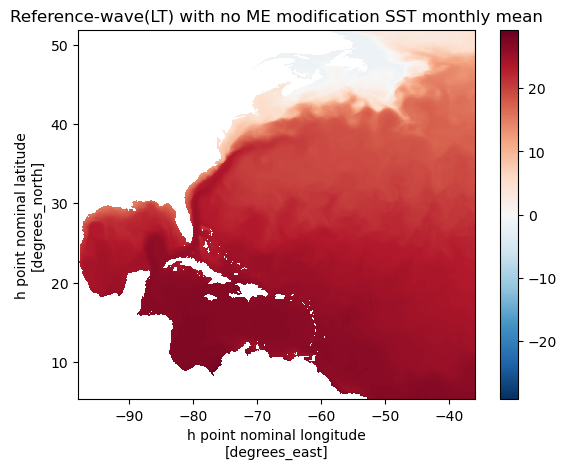

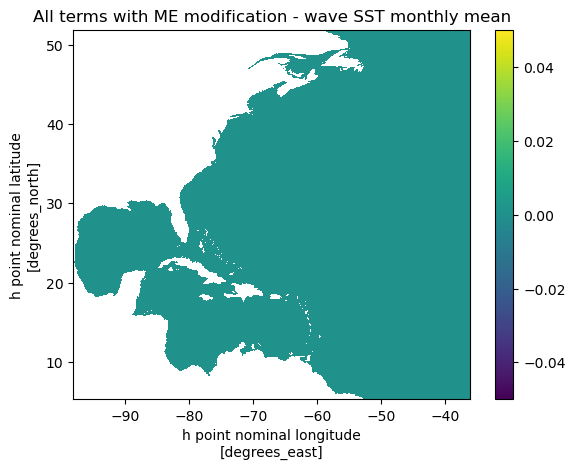

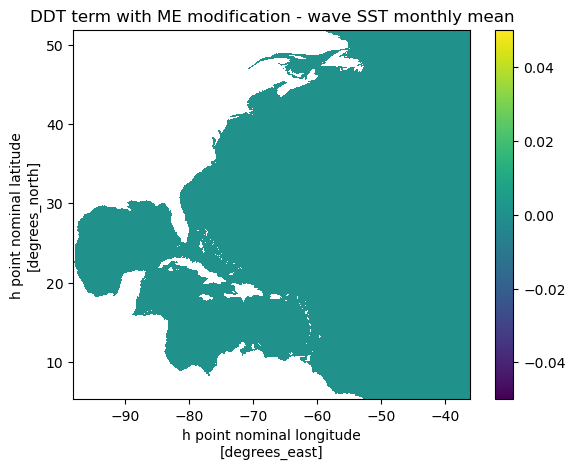

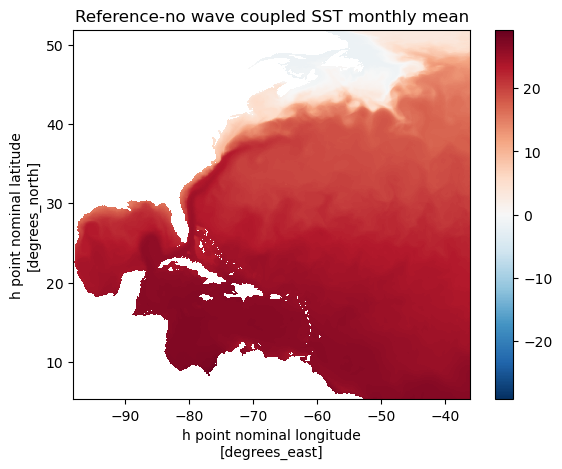

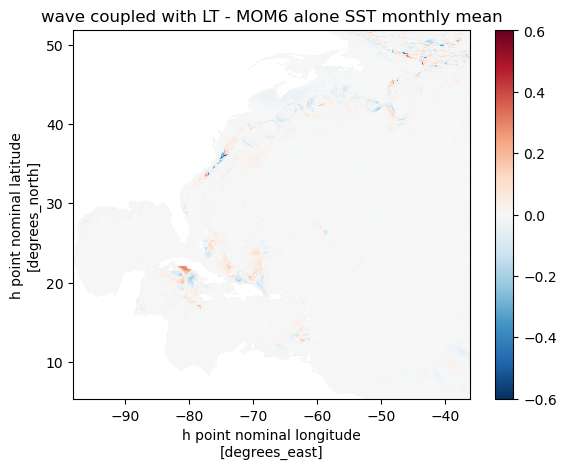

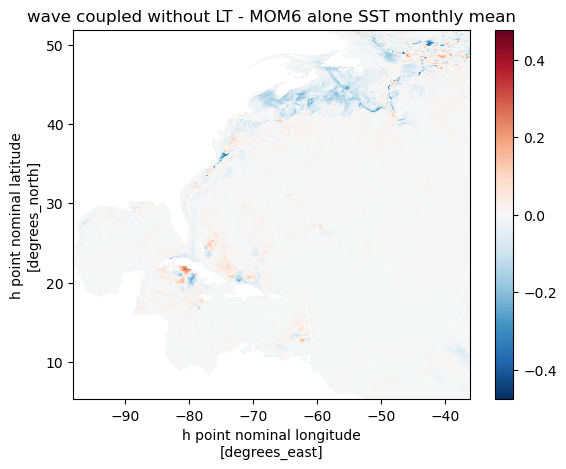

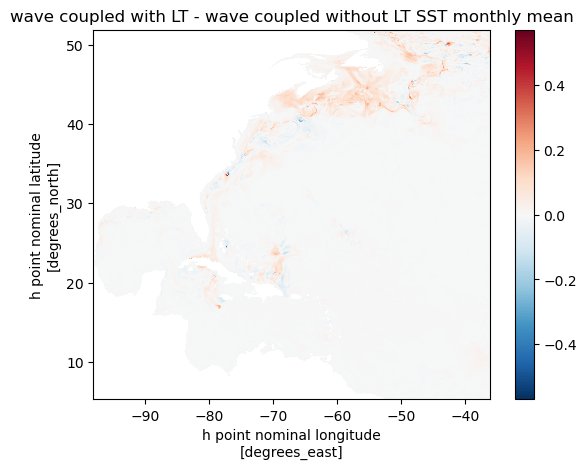

In [5]:
#nx_wave=ocean_daily_wave.variables['x']
daSST_wave_ave=xarray.DataArray(SST_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
daSST_wave_ave.plot()
plt.title('Reference-wave(LT) with no ME modification SST monthly mean')

###show the difference
diff_SST_all_ave=SST_all_ave - SST_wave_ave
da_diff_SST_all=xarray.DataArray(diff_SST_all_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_SST_all.plot()
plt.title('All terms with ME modification - wave SST monthly mean')
plt.show()


diff_SST_ddt_ave=SST_ddt_ave - SST_wave_ave
da_diff_SST_ddt=xarray.DataArray(diff_SST_ddt_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_SST_ddt.plot()
plt.title('DDT term with ME modification - wave SST monthly mean')
plt.show()

#---------------------------LT investigation
daSST_uncou_ave=xarray.DataArray(SST_uncou_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
daSST_uncou_ave.plot()
plt.title('Reference-no wave coupled SST monthly mean')

diff_SST_wave_ave=SST_wave_ave - SST_uncou_ave
da_diff_SST_wave=xarray.DataArray(diff_SST_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_SST_wave.plot()
plt.title('wave coupled with LT - MOM6 alone SST monthly mean')
plt.show()

diff_SST_nolan_ave=SST_nolan_ave - SST_uncou_ave
da_diff_SST_nolan=xarray.DataArray(diff_SST_nolan_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_SST_nolan.plot()
plt.title('wave coupled without LT - MOM6 alone SST monthly mean')
plt.show()

diff_SST_wavenolan_ave=SST_wave_ave - SST_nolan_ave
da_diff_SST_wavenolan=xarray.DataArray(diff_SST_wavenolan_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_SST_wavenolan.plot()
plt.title('wave coupled with LT - wave coupled without LT SST monthly mean')
plt.show()

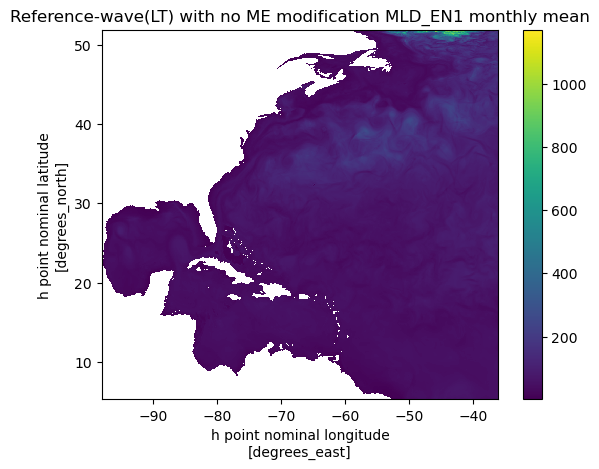

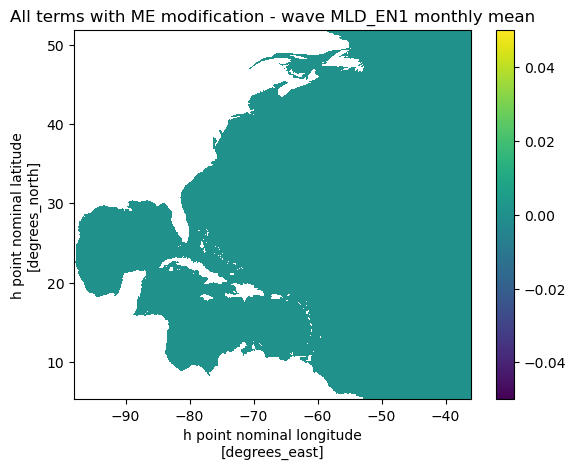

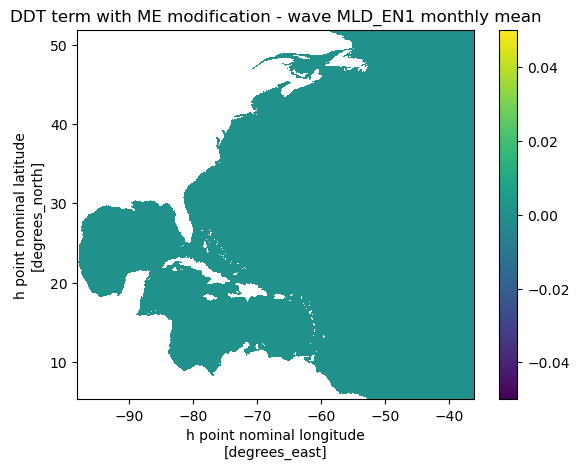

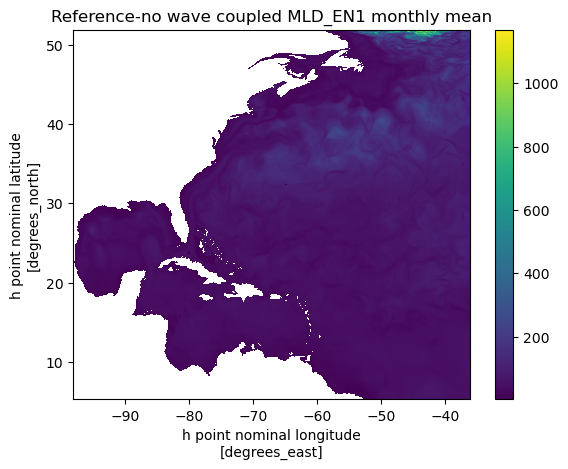

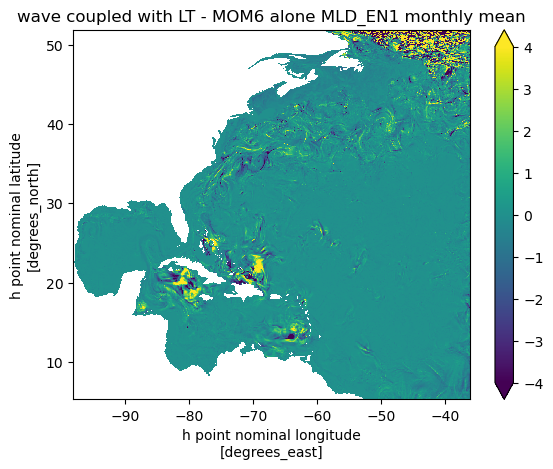

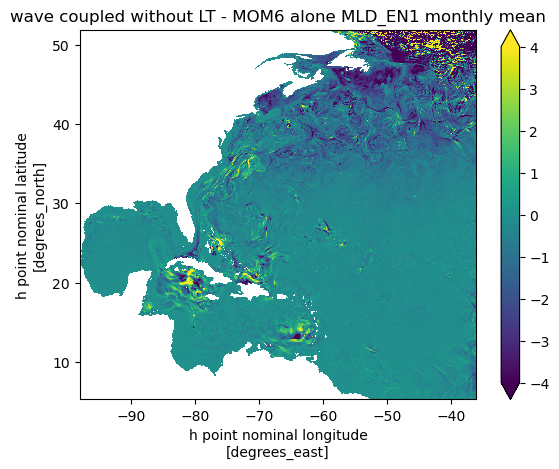

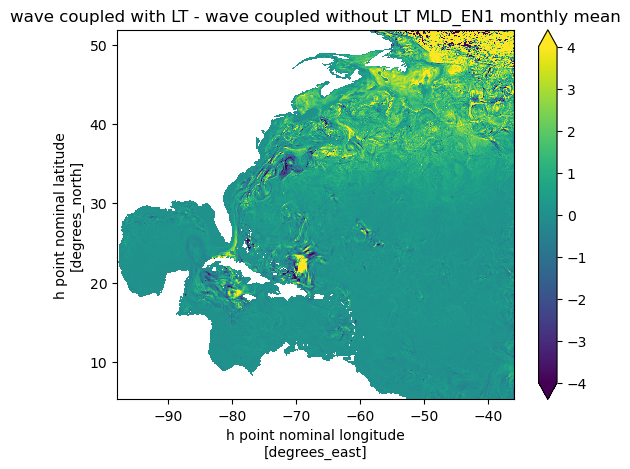

In [10]:
#--------------------------------MLD_user MLD_EN
daMLD_EN1_wave_ave=xarray.DataArray(MLD_EN1_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
daMLD_EN1_wave_ave.plot()
plt.title('Reference-wave(LT) with no ME modification MLD_EN1 monthly mean')

###show the difference
diff_MLD_EN1_all_ave=MLD_EN1_all_ave - MLD_EN1_wave_ave
da_diff_MLD_EN1_all=xarray.DataArray(diff_MLD_EN1_all_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_MLD_EN1_all.plot()
plt.title('All terms with ME modification - wave MLD_EN1 monthly mean')
plt.show()


diff_MLD_EN1_ddt_ave=MLD_EN1_ddt_ave - MLD_EN1_wave_ave
da_diff_MLD_EN1_ddt=xarray.DataArray(diff_MLD_EN1_ddt_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_MLD_EN1_ddt.plot()
plt.title('DDT term with ME modification - wave MLD_EN1 monthly mean')
plt.show()

#---------------------------LT investigation
daMLD_EN1_uncou_ave=xarray.DataArray(MLD_EN1_uncou_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
daMLD_EN1_uncou_ave.plot()
plt.title('Reference-no wave coupled MLD_EN1 monthly mean')

diff_MLD_EN1_wave_ave=MLD_EN1_wave_ave - MLD_EN1_uncou_ave
da_diff_MLD_EN1_wave=xarray.DataArray(diff_MLD_EN1_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_MLD_EN1_wave.plot(vmin=-4,vmax=4)
plt.title('wave coupled with LT - MOM6 alone MLD_EN1 monthly mean')
plt.show()

diff_MLD_EN1_nolan_ave=MLD_EN1_nolan_ave - MLD_EN1_uncou_ave
da_diff_MLD_EN1_nolan=xarray.DataArray(diff_MLD_EN1_nolan_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_MLD_EN1_nolan.plot(vmin=-4,vmax=4)
plt.title('wave coupled without LT - MOM6 alone MLD_EN1 monthly mean')
plt.show()

diff_MLD_EN1_wavenolan_ave=MLD_EN1_wave_ave - MLD_EN1_nolan_ave
da_diff_MLD_EN1_wavenolan=xarray.DataArray(diff_MLD_EN1_wavenolan_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_MLD_EN1_wavenolan.plot(vmin=-4,vmax=4)
plt.title('wave coupled with LT - wave coupled without LT MLD_EN1 monthly mean')
plt.show()

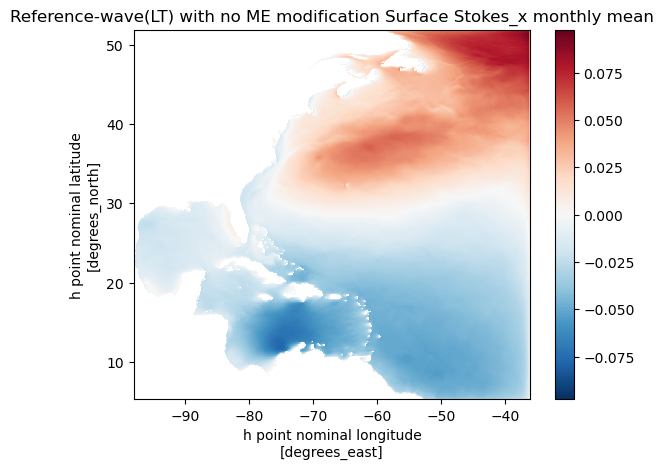

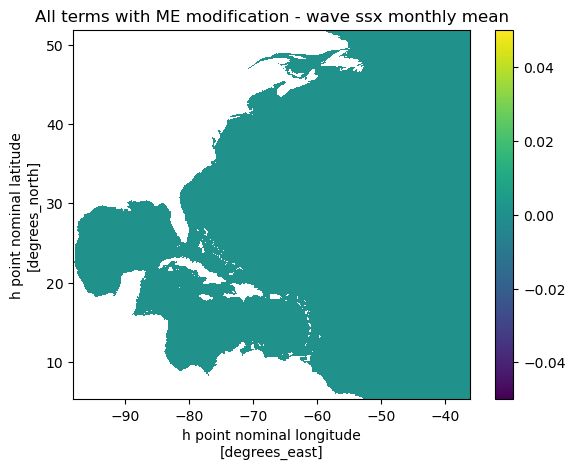

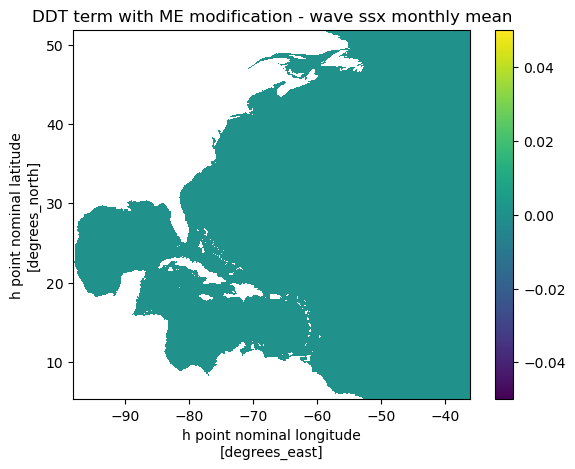

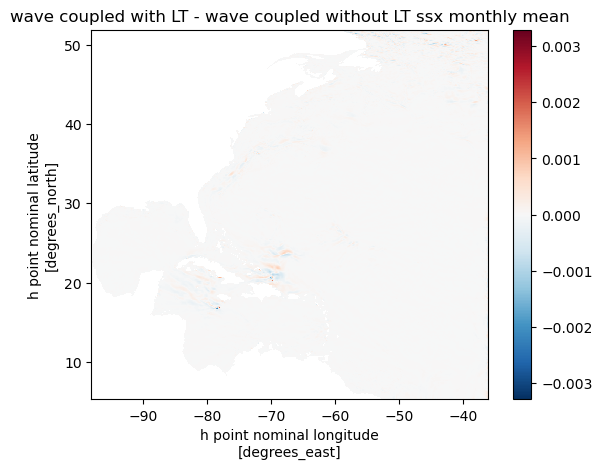

In [10]:
#-------------------------------surfaceStokes_x surface_stokes_y
dassx_wave_ave=xarray.DataArray(ssx_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
dassx_wave_ave.plot()
plt.title('Reference-wave(LT) with no ME modification Surface Stokes_x monthly mean')

###show the difference
diff_ssx_all_ave=ssx_all_ave - ssx_wave_ave
da_diff_ssx_all=xarray.DataArray(diff_ssx_all_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssx_all.plot()
plt.title('All terms with ME modification - wave ssx monthly mean')
plt.show()


diff_ssx_ddt_ave=ssx_ddt_ave - ssx_wave_ave
da_diff_ssx_ddt=xarray.DataArray(diff_ssx_ddt_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssx_ddt.plot()
plt.title('DDT term with ME modification - wave ssx monthly mean')
plt.show()

#---------------------------LT investigation
diff_ssx_wavenolan_ave=ssx_wave_ave - ssx_nolan_ave
da_diff_ssx_wavenolan=xarray.DataArray(diff_ssx_wavenolan_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssx_wavenolan.plot()
plt.title('wave coupled with LT - wave coupled without LT ssx monthly mean')
plt.show()

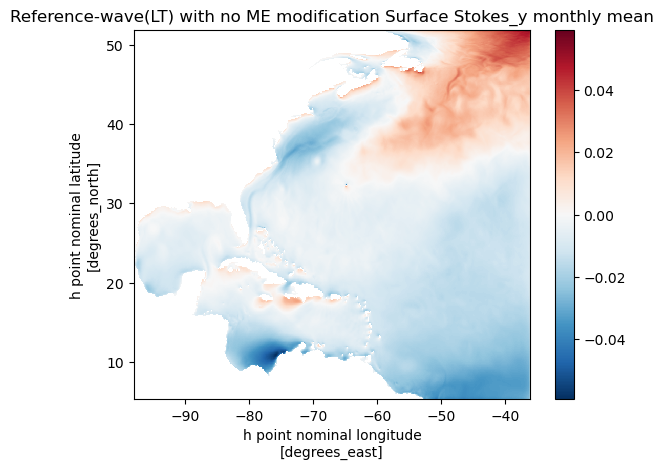

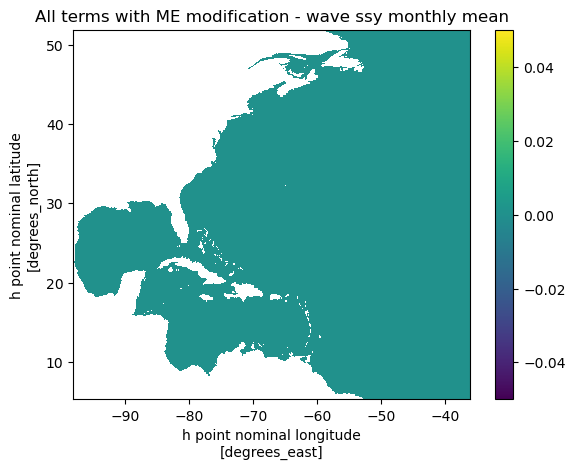

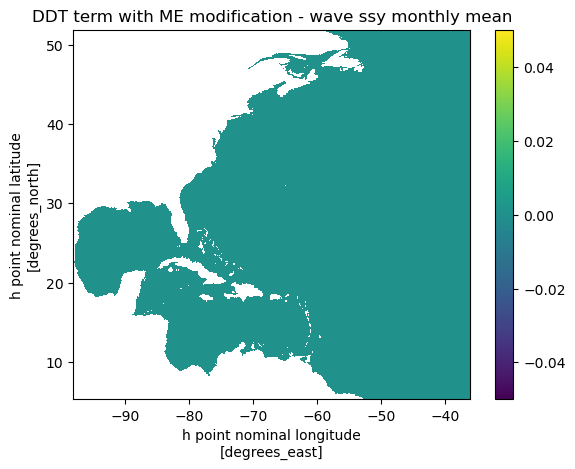

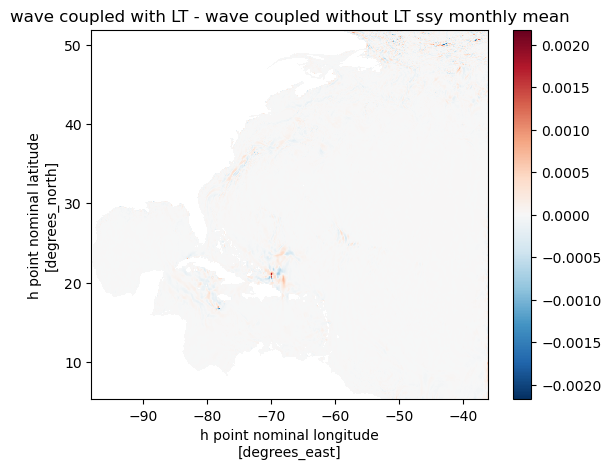

In [11]:
#-------------------------------surfaceStokes_x surface_stokes_y
dassy_wave_ave=xarray.DataArray(ssy_wave_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
dassy_wave_ave.plot()
plt.title('Reference-wave(LT) with no ME modification Surface Stokes_y monthly mean')

###show the difference
diff_ssy_all_ave=ssy_all_ave - ssy_wave_ave
da_diff_ssy_all=xarray.DataArray(diff_ssy_all_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssy_all.plot()
plt.title('All terms with ME modification - wave ssy monthly mean')
plt.show()


diff_ssy_ddt_ave=ssy_ddt_ave - ssy_wave_ave
da_diff_ssy_ddt=xarray.DataArray(diff_ssy_ddt_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssy_ddt.plot()
plt.title('DDT term with ME modification - wave ssy monthly mean')
plt.show()

#---------------------------LT investigation
diff_ssy_wavenolan_ave=ssy_wave_ave - ssy_nolan_ave
da_diff_ssy_wavenolan=xarray.DataArray(diff_ssy_wavenolan_ave, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
da_diff_ssy_wavenolan.plot()
plt.title('wave coupled with LT - wave coupled without LT ssy monthly mean')
plt.show()

In [2]:
ssh_all

<xarray.Variable (time: 59, yh: 845, xh: 775)>
array([[[      nan,       nan, ...,  0.054342,  0.052093],
        [      nan,       nan, ...,  0.046307,  0.043981],
        ...,
        [      nan,       nan, ..., -1.044433, -1.031035],
        [      nan,       nan, ..., -1.047314, -1.035883]],

       [[      nan,       nan, ...,  0.039705,  0.037978],
        [      nan,       nan, ...,  0.030036,  0.028293],
        ...,
        [      nan,       nan, ..., -1.056213, -1.042802],
        [      nan,       nan, ..., -1.060464, -1.047005]],

       ...,

       [[      nan,       nan, ...,  0.051766,  0.051124],
        [      nan,       nan, ...,  0.051009,  0.050391],
        ...,
        [      nan,       nan, ..., -1.034742, -1.031018],
        [      nan,       nan, ..., -1.03715 , -1.033127]],

       [[      nan,       nan, ...,  0.053508,  0.053394],
        [      nan,       nan, ...,  0.05345 ,  0.052919],
        ...,
        [      nan,       nan, ..., -1.051307, -1.048182],
        [      nan,       nan, ..., -1.051589, -1.04814 ]]], dtype=float32)
Attributes:
    units:          m
    long_name:      Sea Surface Height
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT